In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [33]:
X, y = load_wine(return_X_y=True)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [35]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier()),
    ]
)

In [36]:
param_grid = {
    "clf__n_neighbors": [3, 5, 7, 9, 11, 15, 21],
    "clf__weights": ["uniform", "distance"],
    "clf__metric": ["euclidean", "manhattan", "minkowski"],
}

In [37]:
grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    return_train_score=True,
)

In [38]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'clf__n_neighbors': [3, 5, 7, 9, 11, 15, 21],
                         'clf__weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

In [39]:
print(f"Meilleur paramètres : {grid.best_params_}")
print(f"Meilleur score CV : {grid.best_score_}")

Meilleur paramètres : {'clf__metric': 'manhattan', 'clf__n_neighbors': 9, 'clf__weights': 'uniform'}
Meilleur score CV : 0.9862068965517242


In [40]:
results = pd.DataFrame(grid.cv_results_)
top_5 = results.nlargest(5, "mean_test_score")
top_5.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__metric,param_clf__n_neighbors,param_clf__weights,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
20,0.001604,0.000071,0.002245,0.000046,manhattan,9,uniform,"{'clf__metric': 'manhattan', 'clf__n_neighbors...",1.000000,0.931034,...,0.986207,0.027586,1,0.973451,0.99115,0.982456,0.982456,0.982456,0.982394,0.005597
21,0.001630,0.000255,0.001764,0.000252,manhattan,9,distance,"{'clf__metric': 'manhattan', 'clf__n_neighbors...",1.000000,0.931034,...,0.986207,0.027586,1,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000
18,0.001743,0.000272,0.002331,0.000352,manhattan,7,uniform,"{'clf__metric': 'manhattan', 'clf__n_neighbors...",1.000000,0.965517,...,0.985961,0.017199,3,0.973451,1.00000,0.991228,0.973684,0.973684,0.982410,0.011133
19,0.001593,0.000120,0.001729,0.000114,manhattan,7,distance,"{'clf__metric': 'manhattan', 'clf__n_neighbors...",1.000000,0.965517,...,0.985961,0.017199,3,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000
22,0.001548,0.000094,0.002240,0.000084,manhattan,11,uniform,"{'clf__metric': 'manhattan', 'clf__n_neighbors...",0.965517,0.931034,...,0.979310,0.027586,5,0.973451,0.99115,0.982456,0.973684,0.982456,0.980640,0.006590


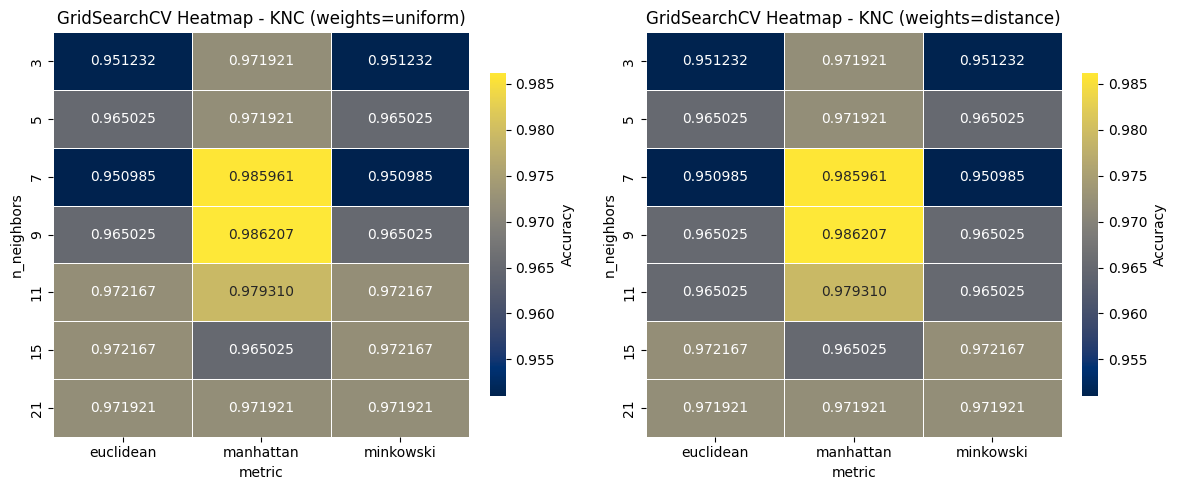

In [44]:
uniform_results = results[results["param_clf__weights"] == "uniform"].copy()

pivot_uniform = uniform_results.pivot_table(
    values="mean_test_score",
    index="param_clf__n_neighbors",
    columns="param_clf__metric",
    aggfunc="mean",
)

distance_results = results[results["param_clf__weights"] == "distance"].copy()

pivot_distance = distance_results.pivot_table(
    values="mean_test_score",
    index="param_clf__n_neighbors",
    columns="param_clf__metric",
    aggfunc="mean",
)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ax1 = axes[0]
sns.heatmap(
    pivot_uniform,
    annot=True,
    fmt=".6f",
    cmap="cividis",
    linewidths=0.6,
    linecolor="white",
    cbar_kws={"shrink": 0.8, "pad": 0.04, "label": "Accuracy"},
    annot_kws={"size": 10},
    ax=ax1,
)
ax1.set_ylabel("n_neighbors")
ax1.set_xlabel("metric")
ax1.set_title("GridSearchCV Heatmap - KNC (weights=uniform)")

ax2 = axes[1]
sns.heatmap(
    pivot_distance,
    annot=True,
    fmt=".6f",
    cmap="cividis",
    linewidths=0.6,
    linecolor="white",
    cbar_kws={"shrink": 0.8, "pad": 0.04, "label": "Accuracy"},
    annot_kws={"size": 10},
    ax=ax2,
)
ax2.set_ylabel("n_neighbors")
ax2.set_xlabel("metric")
ax2.set_title("GridSearchCV Heatmap - KNC (weights=distance)")

plt.tight_layout()
plt.show()